In [31]:
from datascience import *
import numpy as np
%matplotlib inline

Die Sum,count
2,279
3,541
4,846
5,1159
6,1423
7,1662
8,1357
9,1118
10,806
11,538


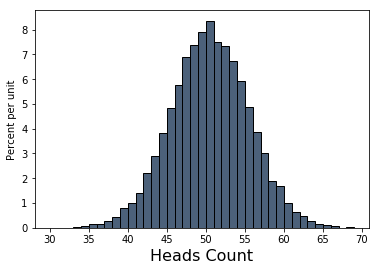

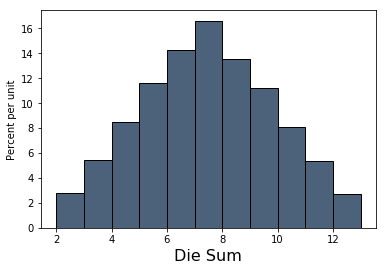

In [67]:
# 9.3 Simulation

coins = ['heads', 'tails']
result = []
for i in np.arange(10000):
    result.append(np.count_nonzero(np.random.choice(coins, 100) == 'heads'))
#result
heads = Table().with_columns(
    '#', np.arange(1, 10001),
    'Heads Count', result
)
heads.hist('Heads Count', bins=np.arange(30, 70, 1))
heads

# Monopoly
die = np.arange(1,7)
result = []
for i in np.arange(10000):
    result.append(np.random.choice(die, 2).sum())
monopoly = Table().with_columns(
    '#', np.arange(1, 10001),
    'Die Sum', result,
)
monopoly.hist('Die Sum', bins = np.arange(2, 14, 1))
monopoly.group('Die Sum').show(11)

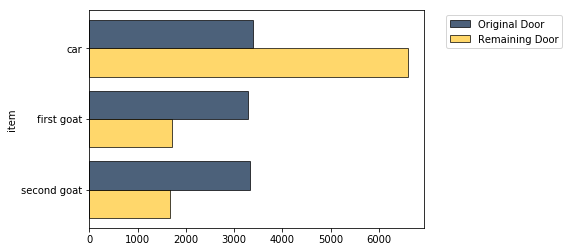

In [87]:
# 9.4 The Monty Hall Problem

def other_goat(one_goat):
    if one_goat == 'first goat':
        return 'second goat'
    else:
        return 'first goat'
    
def monty_hall_game():
    hidden_behind_doors = ['first goat', 'second goat', 'car']
    goats = ['first goat', 'second goat']
    contestant_guess = np.random.choice(hidden_behind_doors)
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    elif contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    else: # car
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

games = Table(['Guess', 'Revealed', 'Remaining'])
for i in np.arange(10000):
    games.append(monty_hall_game())
    
original_choice = games.group('Guess')
remaining_door = games.group('Remaining')
joined = original_choice.join('Guess', remaining_door, 'Remaining')
joined = joined.relabeled(0, 'item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
joined
joined.barh('item')